In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()


In [3]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 925152565531548213
xla_global_id: -1
]


In [3]:
train_images=train_images[:, :, :, np.newaxis]
test_images=test_images[:, :, :, np.newaxis]
train_images, test_images=train_images/255, test_images/255

In [4]:
model=keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1),
                        kernel_size=(3, 3), padding='same',filters=32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size=(3, 3), padding='same', filters=64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size=(3, 3), padding='same', filters=32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

d:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,570 (947.54 KB)

 Trainable params: 242,570 (947.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist=model.fit(train_images, train_labels, epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.7706 - loss: 0.6391 - val_accuracy: 0.8721 - val_loss: 0.3440
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.8894 - loss: 0.3033 - val_accuracy: 0.8920 - val_loss: 0.2984
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.9081 - loss: 0.2471 - val_accuracy: 0.9027 - val_loss: 0.2715
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.9210 - loss: 0.2101 - val_accuracy: 0.9100 - val_loss: 0.2525
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.9343 - loss: 0.1777 - val_accuracy: 0.9107 - val_loss: 0.2574


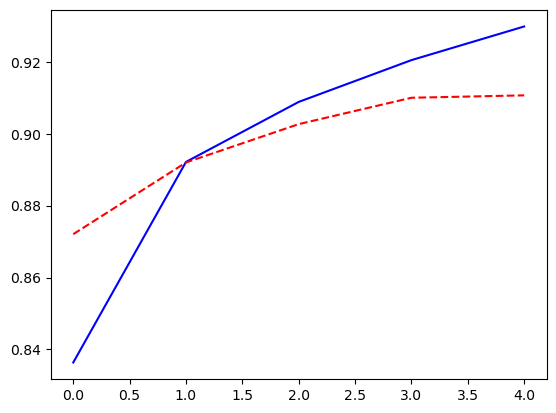

In [6]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

In [7]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도: ', test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.9027 - loss: 0.2759
테스트 정확도:  0.9027000069618225


In [8]:
mnist_lbl=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

images=test_images[:25]
pred=np.argmax(model.predict(images), axis=1)
print("예측값: ", pred)
print("실제값: ", test_labels[:25])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
예측값:  [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 4 8 0 2 5 7 5 1]
실제값:  [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


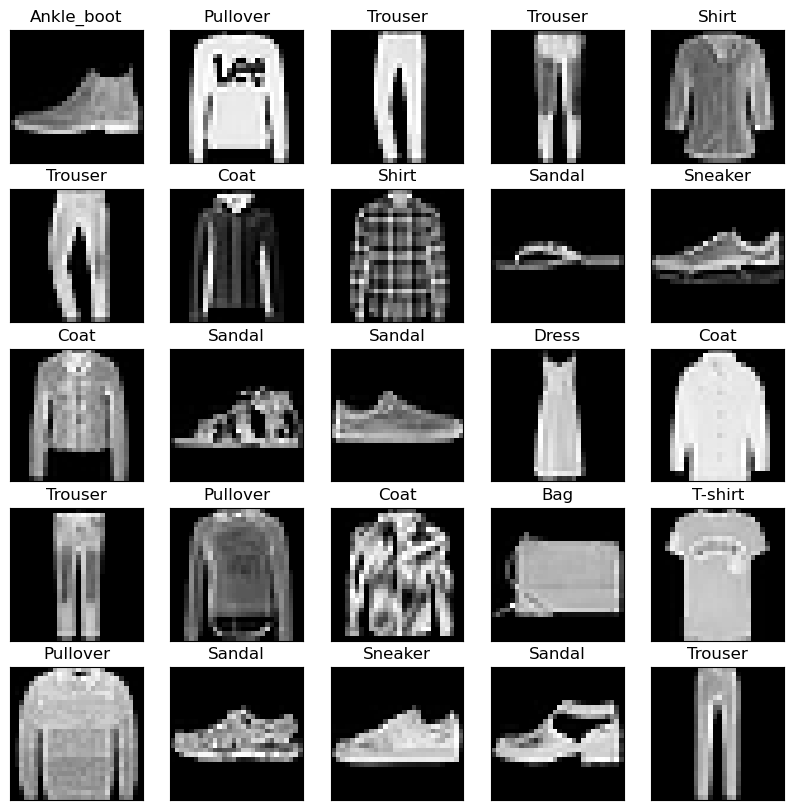

In [9]:
def plot_images(images, labels, images_per_row=5):
    n_images=len(images)
    n_rows=(n_images-1)//images_per_row+1
    fig, ax=plt.subplots(n_rows, images_per_row,
                         figsize=(images_per_row*2, n_rows*2))
    
    for i in range(n_rows):
        for j in range(images_per_row):
            if i*images_per_row+j>=n_images: break
            img_idx=i*images_per_row+j
            a_image=images[img_idx].reshape(28, 28)
            if n_rows>1: axis=ax[i, j]
            else: axis=ax[j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            label=mnist_lbl[labels[img_idx]]
            axis.set_title(label)
            axis.imshow(a_image, cmap='gray', interpolation='nearest')

plot_images(images, pred, images_per_row=5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


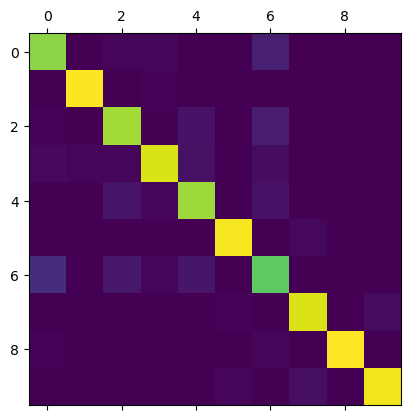

In [10]:
from sklearn.metrics import confusion_matrix

pred=np.argmax(model.predict(test_images), axis=1)
conf_mat=confusion_matrix(pred, test_labels)
plt.matshow(conf_mat)

In [11]:
print(conf_mat)

[[816   0  12  19   1   0  85   0   3   0]
 [  1 982   1   9   2   0   2   0   1   0]
 [ 11   0 851   4  48   0  76   0   0   0]
 [ 24  12  13 933  45   0  34   0   4   0]
 [  6   1  56  13 842   0  47   0   1   0]
 [  0   0   0   0   1 974   0  22   1   3]
 [131   1  65  17  58   0 741   0   2   0]
 [  0   0   0   0   0  10   0 935   1  30]
 [ 11   4   2   5   3   1  14   2 987   1]
 [  0   0   0   0   0  15   1  41   0 966]]
